1980~2020에 개봉한 영화에 대한 데이터를 분석한다.  
영화에 대한 궁금증과 몰랐던 사실들을 알아보고자 이러한 데이터를 선정했다.  
자료 출처: 'Movie Industry-Four decades of movies',DANIEL GRIJALVA,https://www.kaggle.com/datasets/danielgrijalvas/movies

In [1]:
import pandas as pd

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [3]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [4]:
import seaborn as sns

In [5]:
plt.rcParams["figure.figsize"] = (12, 9)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
filename = '/content/movies.csv'

In [8]:
df = pd.read_csv("movies.csv")

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
df.shape

(7668, 15)

In [12]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [13]:
df2 = df.copy()
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


결측값처리해야됨! 제목엔 결측값 없음  
결측값 처리 -> 정수형으로 바꿀수 있는거 정수형으로바꾸기?  
director, year, genre, name 결측값 없음!  
스코어는 평균, 작가
개봉일자에서 국가빼고 날짜타입으로 바꾸기  
파생변수: roi=순수익/총투자액*100,  
개봉년도-러닝타임(시계열그래프), 등급-roi(막대그래프or상관관계), 감독-스코어(막대그래프), 영화사(원형그래프), 러닝타임-roi(상관관계)

scroe, votes, budget, gross, runtime은 평균으로 채우고  
나머지 결측값있는 항목은 제거->

#결측값 처리

In [14]:
score = df2['score'].mean() #결측값 평균으로 채우기
score

6.390410958904109

In [15]:
df2['score'] = df2['score'].fillna(score)

In [16]:
votes = df2['votes'].mean()#결측값 평균으로 채우기
votes

88108.50476190477

In [17]:
df2['votes'] = df2['votes'].fillna(votes) #결측값 평균으로 채우기

In [18]:
budget = df2['budget'].mean()
budget

35589876.192650534

In [19]:
df2['budget'] = df2['budget'].fillna(budget) #결측값 평균으로 채우기

In [20]:
gross = df2['gross'].mean()
gross

78500541.01778312

In [21]:
df2['gross'] = df2['gross'].fillna(gross) #결측값 평균으로 채우기

In [22]:
runtime = df2['runtime'].mean()
runtime

107.2616127348643

In [23]:
df2['runtime'] = df2['runtime'].fillna(runtime) #결측값 평균으로 채우기

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [25]:
df2 = df2.dropna() #결측값 있는 행 제거

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7576 non-null   object 
 1   rating    7576 non-null   object 
 2   genre     7576 non-null   object 
 3   year      7576 non-null   int64  
 4   released  7576 non-null   object 
 5   score     7576 non-null   float64
 6   votes     7576 non-null   float64
 7   director  7576 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7576 non-null   object 
 10  country   7576 non-null   object 
 11  budget    7576 non-null   float64
 12  gross     7576 non-null   float64
 13  company   7576 non-null   object 
 14  runtime   7576 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.0+ KB


In [27]:
df2.shape

(7576, 15)

In [28]:
df2.describe()

,year,score,votes,budget,gross,runtime
count,7576.000000,7576.000000,7.576000e+03,7.576000e+03,7.576000e+03,7576.000000
mean,2000.381204,6.389201,8.893430e+04,3.567737e+07,7.897755e+07,107.292933
std,11.110481,0.968364,1.640211e+05,3.526803e+07,1.644079e+08,18.582930
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.844968e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.151432e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,3.558988e+07,7.850054e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [29]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
df2['runtime'] = df2['runtime'].astype(int)

In [31]:
df2['votes'] = df2['votes'].astype(int)

In [32]:
df2['gross'] = df2['gross'].astype(int)

In [33]:
df2['budget'] = df2['budget'].astype(int)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7576 non-null   object 
 1   rating    7576 non-null   object 
 2   genre     7576 non-null   object 
 3   year      7576 non-null   int64  
 4   released  7576 non-null   object 
 5   score     7576 non-null   float64
 6   votes     7576 non-null   int64  
 7   director  7576 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7576 non-null   object 
 10  country   7576 non-null   object 
 11  budget    7576 non-null   int64  
 12  gross     7576 non-null   int64  
 13  company   7576 non-null   object 
 14  runtime   7576 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 947.0+ KB


In [35]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [36]:
df3 = df2.copy()

In [37]:
df3['roi'] = df3['gross'] / df3['budget'] * 100
df3 #투자대비수익률(ROI) 파생변수 생성

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,roi
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,2.473620e+02
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1.307847e+03
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2.990973e+03
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2.384387e+03
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,6.641057e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98,1.028663e-02
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120,1.161504e+00
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78,1.570011e+06
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87,3.727465e-02


In [38]:
df3['timecost'] = df3['budget'] / df3['runtime']
df3 #분당제작비(제작비/러닝타임) 파생변수 제작

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,2.473620e+02,130136.986301
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1.307847e+03,43269.230769
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2.990973e+03,145161.290323
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2.384387e+03,39772.727273
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,6.641057e+02,61224.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98,1.028663e-02,363162.000000
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120,1.161504e+00,296582.300000
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78,1.570011e+06,64.102564
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87,3.727465e-02,409079.034483


In [39]:
df4 = df3.drop(['released'], axis=1) #released열 제거
df4.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,247.361958,130136.986301
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1307.846800,43269.230769
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.972594,145161.290323
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2384.386829,39772.727273
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,664.105733,61224.489796


In [40]:
df4['rating'].value_counts() #영화 관람 등급(rating) 정리

R            3690
PG-13        2111
PG           1249
Not Rated     282
G             153
Unrated        50
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

**미국영화협회(MPAA) 기준(2006)** **굵은 텍스트**  
G: 부모 동반(아동 관람 부적합)  
PG: 부모 동반(아동 관람 부적합)  
PG-13: 부모 주의(부분적 13세 미만 부적합)  
R: 제한(17세 미만은 부모나 성인 보호자 동반 요망)  
NC-17: 18세 미만은 관람할 수 없는 영화  
Not Rated: 제한상영가/제한관람가  
Unrated: 무등급 컷(심의를 받을 때 등급을 위해 삭제되거나 한 장면을 삭제하지 않고 그대로 넣은 영화) 

**제거대상(영화가 아니거나 불확실한 등급의 영화)**  
텔레비전 프로그램 등급: TV-MA, TV-PG, TV-14  
X  
Aprrovoed

In [41]:
df5 = df4.copy()
df5.head() 

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,247.361958,130136.986301
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1307.846800,43269.230769
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.972594,145161.290323
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2384.386829,39772.727273
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,664.105733,61224.489796


In [42]:
order66 = df5[(df5['rating'] == 'TV-MA') |
              (df5['rating'] == 'TV-PG') |
              (df5['rating'] == 'TV-14') |
              (df5['rating'] == 'X') |
              (df5['rating'] == 'Approved')].index #제거대상 행 인덱스 생성

In [43]:
df5 = df5.drop(order66) #생성된 인덱스로 데이터프레임에서 행 제거

In [44]:
df5['rating'].value_counts() #제거 확인

R            3690
PG-13        2111
PG           1249
Not Rated     282
G             153
Unrated        50
NC-17          23
Name: rating, dtype: int64

In [45]:
df5.shape

(7558, 16)

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 0 to 7661
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7558 non-null   object 
 1   rating    7558 non-null   object 
 2   genre     7558 non-null   object 
 3   year      7558 non-null   int64  
 4   score     7558 non-null   float64
 5   votes     7558 non-null   int64  
 6   director  7558 non-null   object 
 7   writer    7558 non-null   object 
 8   star      7558 non-null   object 
 9   country   7558 non-null   object 
 10  budget    7558 non-null   int64  
 11  gross     7558 non-null   int64  
 12  company   7558 non-null   object 
 13  runtime   7558 non-null   int64  
 14  roi       7558 non-null   float64
 15  timecost  7558 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory usage: 1003.8+ KB


In [47]:
df5.describe()

,year,score,votes,budget,gross,runtime,roi,timecost
count,7558.000000,7558.000000,7.558000e+03,7.558000e+03,7.558000e+03,7558.000000,7.558000e+03,7.558000e+03
mean,2000.379069,6.388316,8.905066e+04,3.568616e+07,7.900428e+07,107.287245,1.272911e+03,3.278681e+05
std,11.104630,0.967631,1.641770e+05,3.530582e+07,1.643840e+08,18.591139,3.957783e+04,3.003839e+05
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000,1.916275e-03,3.750000e+01
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.876381e+06,95.000000,2.723121e+01,1.313131e+05
50%,2000.000000,6.500000,3.300000e+04,3.500000e+07,2.158351e+07,104.000000,1.134399e+02,2.917203e+05
75%,2010.000000,7.100000,9.475000e+04,3.558988e+07,7.850054e+07,116.000000,2.870116e+02,3.868465e+05
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2.616685e+06,2.600000e+06


In [48]:
df5.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,247.361958,130136.986301
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1307.846800,43269.230769
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.972594,145161.290323
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2384.386829,39772.727273
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,664.105733,61224.489796


In [49]:
pd.options.display.float_format = '{: .2f}'.format #데이터프레임을 소수점 둘째 자리 까지 표현

#기술통계

In [111]:
MovieNumbers = df5[['score', 'votes', 'budget', 'gross', 'runtime', 'roi', 'timecost']]
MovieNumbers.head()

,score,votes,budget,gross,runtime,roi,timecost
0,8.40,927000,19000000,46998772,146,247.36,130136.99
1,5.80,65000,4500000,58853106,104,1307.85,43269.23
2,8.70,1200000,18000000,538375067,124,2990.97,145161.29
3,7.70,221000,3500000,83453539,88,2384.39,39772.73
4,7.30,108000,6000000,39846344,98,664.11,61224.49


In [112]:
MovieNumbers.describe()

,score,votes,budget,gross,runtime,roi,timecost
count,7558.00,7558.00,7558.00,7558.00,7558.00,7558.00,7558.00
mean,6.39,89050.66,35686162.39,79004275.95,107.29,1272.91,327868.07
std,0.97,164176.96,35305821.67,164384035.86,18.59,39577.83,300383.92
min,1.90,35.00,3000.00,309.00,63.00,0.00,37.50
25%,5.80,9400.00,14000000.00,4876380.75,95.00,27.23,131313.13
50%,6.50,33000.00,35000000.00,21583509.50,104.00,113.44,291720.30
75%,7.10,94750.00,35589876.00,78500541.00,116.00,287.01,386846.48
max,9.30,2400000.00,356000000.00,2847246203.00,366.00,2616684.70,2600000.00


영화 평점(score)의 평균은 6.39이다.   만약 볼만한 영화를 고르고 있다면 평점(IMDB)이 6.39가 넘는 영화를 보는 것이 합리적일 것이다.  
  
영화의 평균 제작비는 35686162.39	 달러이고 평균 수익은 79004275.95 달러이다.  
두 항목을 보면 영화 산업의 규모를 가늠할 수 있다.  
  
투자자본수익률(ROI)의 평균은 1272.91달러이다.  
  
평균 러닝타임은 107.29분이다.  
  
분당제작비의 평균은 327868.07달러이다. 우리가 보는 영화의 1분이 대략 327868.07달러로 만들어진 셈이다.

#주연 배우-매출
한국에선 '천만 배우'라고 부르는 흥행 보증 수표같은 배우들이 있다. 그렇다면 글로벌적으로도 이러한 흥행 배우들이 있을까?  
주연 배우별로 매출을 구분하여 합을 계산했다.

In [52]:
StarGross = df5[['star', 'gross']]
StarGross2 = StarGross.groupby('star')['gross'].sum()
StarGross3 = StarGross2.sort_values(ascending=False)
StarGross3.head(20)

star
Robert Downey Jr.        11859526234
Tom Hanks                 9952423823
Tom Cruise                9440309875
Daniel Radcliffe          7954064886
Will Smith                7947279234
Johnny Depp               7444238998
Leonardo DiCaprio         6963367648
Vin Diesel                6036312568
Dwayne Johnson            5711270624
Bruce Willis              5318951036
Chris Pratt               5278456138
Ben Stiller               5257346651
Adam Sandler              4949566857
Harrison Ford             4897078169
Daisy Ridley              4480695234
Jim Carrey                4463262636
Mark Wahlberg             4347564851
Sandra Bullock            4281853897
Mel Gibson                4214841909
Arnold Schwarzenegger     4198601237
Name: gross, dtype: int64

In [53]:
StarGross4 = StarGross3.head(10)

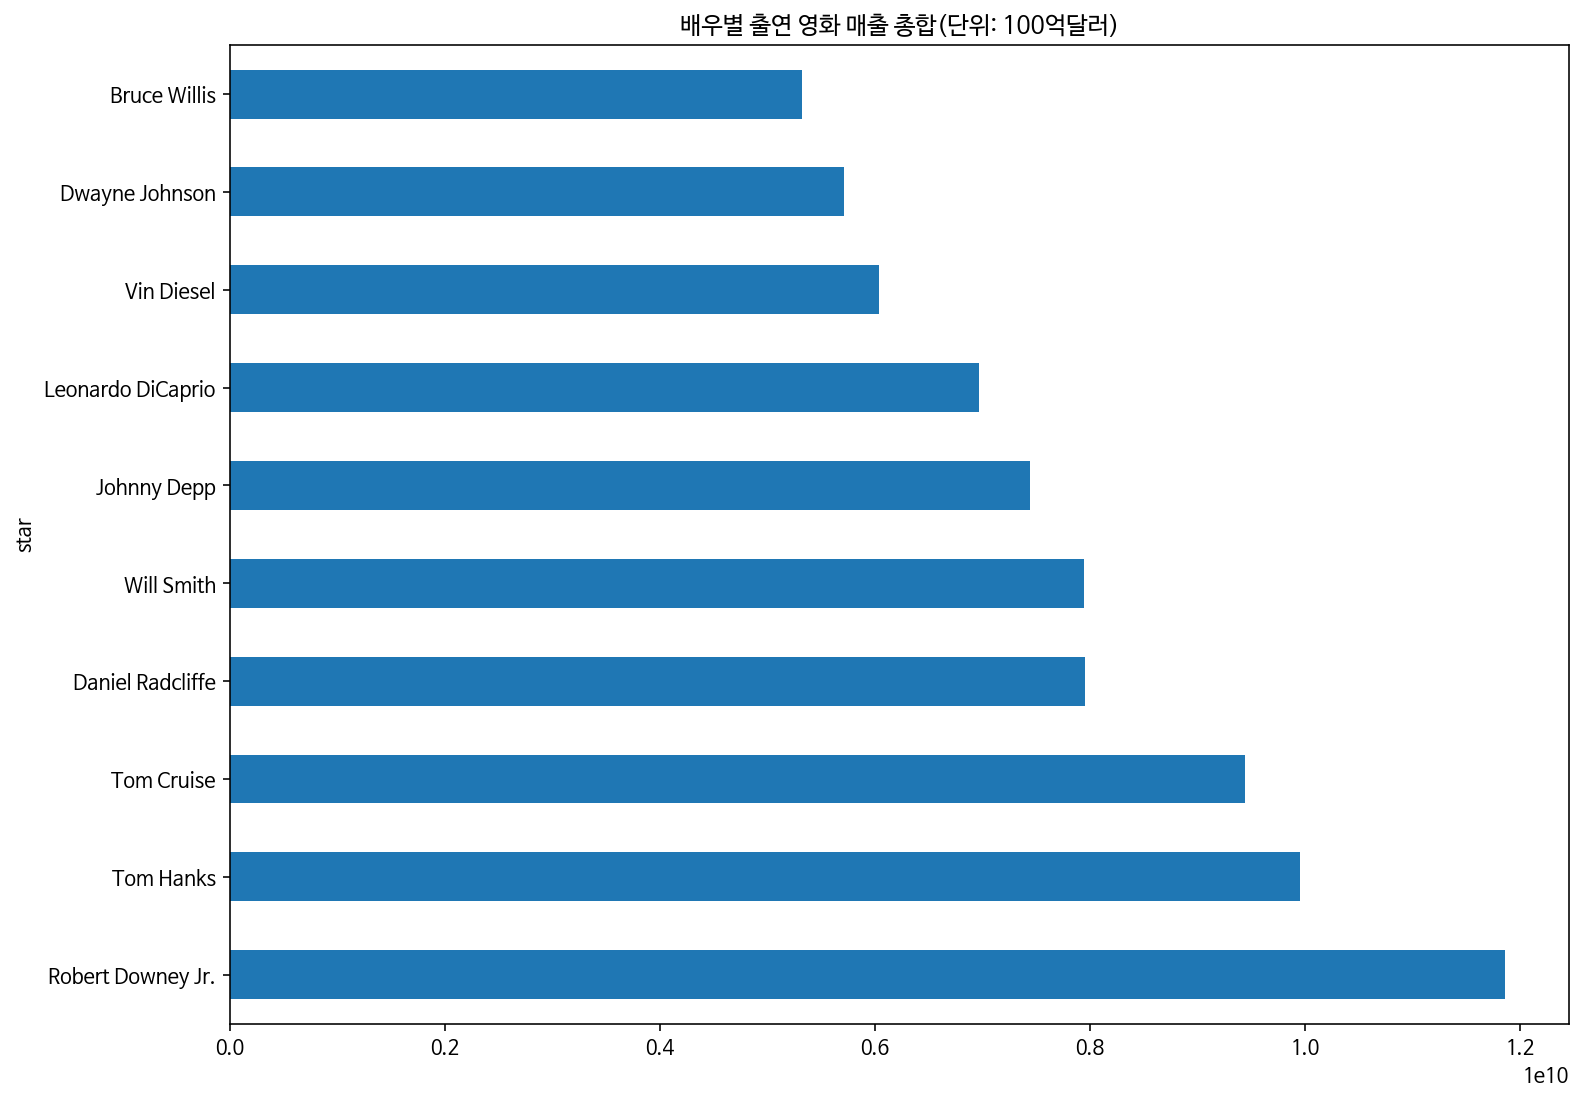

In [54]:
StarGross4.plot(kind='barh', title="배우별 출연 영화 매출 총합(단위: 100억달러)")

매출 총합이 가장 높은 배우 20위에는 톰 행크스, 톰 크루즈, 윌스미스, 빈디젤, 해리슨 포드와 같이 이름만 들어도 알 수 있을 만한 배우들이 많이 속해 있다.  
아이언맨 로버트 다우니 주니어가 가장 많은 매출을 기록한 배우로 기록됐다. 미국의 국민배우 톰 행크스보다 약 20억 달러 높은 매출 총합을 기록했다.

#제작비 - 매출

In [55]:
Budget100 = df5.sort_values('budget', ascending=False).head(100)
Budget100.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
7445,Avengers: Endgame,PG-13,Action,2019,8.40,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,785.81,1966850.83
7244,Avengers: Infinity War,PG-13,Action,2018,8.40,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,638.12,2154362.42
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.00,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,420.41,2085526.32
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.10,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,320.33,1775147.93
7066,Justice League,PG-13,Action,2017,6.10,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,219.31,2500000.00


In [56]:
BudgetGrossScore = Budget100[['budget', 'gross', 'score']]
BudgetGrossScore.head()

,budget,gross,score
7445,356000000,2797501328,8.40
7244,321000000,2048359754,8.40
7075,317000000,1332698830,7.00
5060,300000000,960996492,7.10
7066,300000000,657926987,6.10


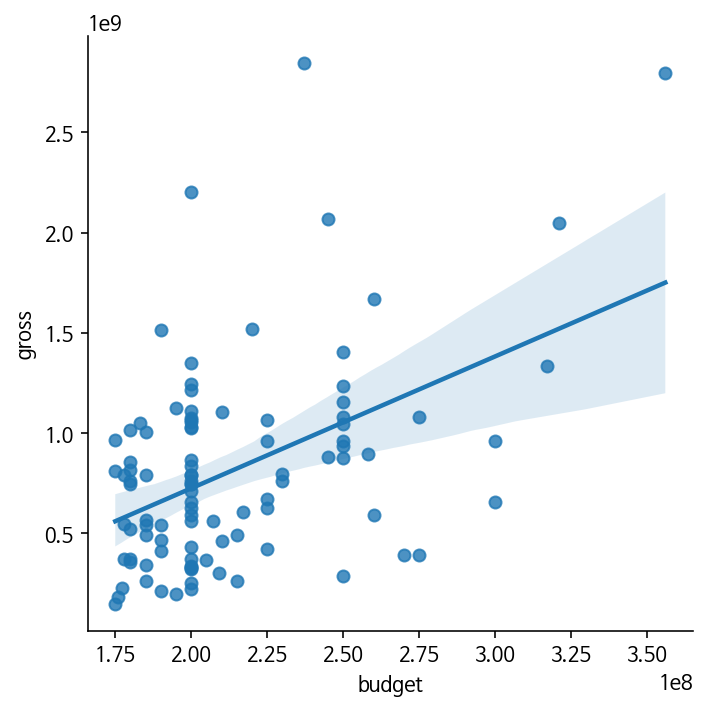

In [57]:
sns.lmplot(x='budget', y='gross', data=BudgetGrossScore) 

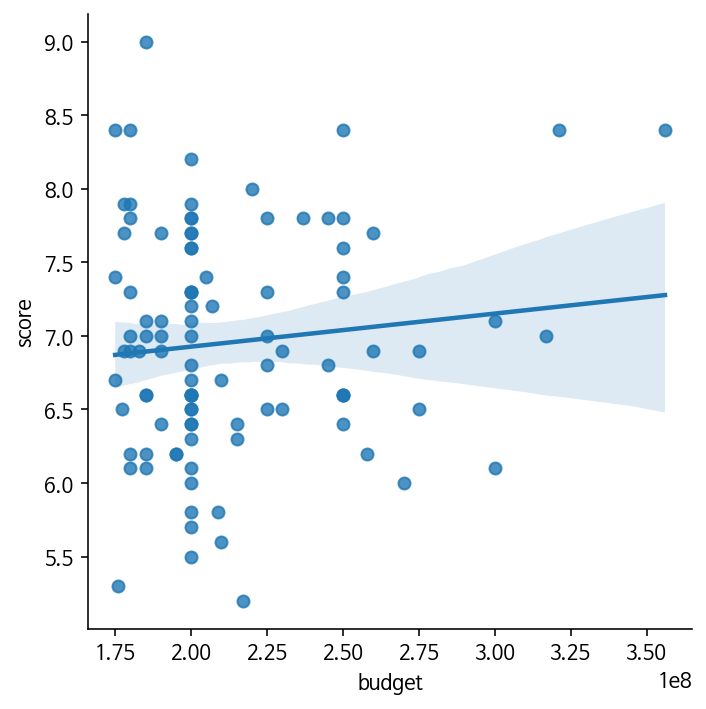

In [58]:
sns.lmplot(x='budget', y='score', data=BudgetGrossScore)

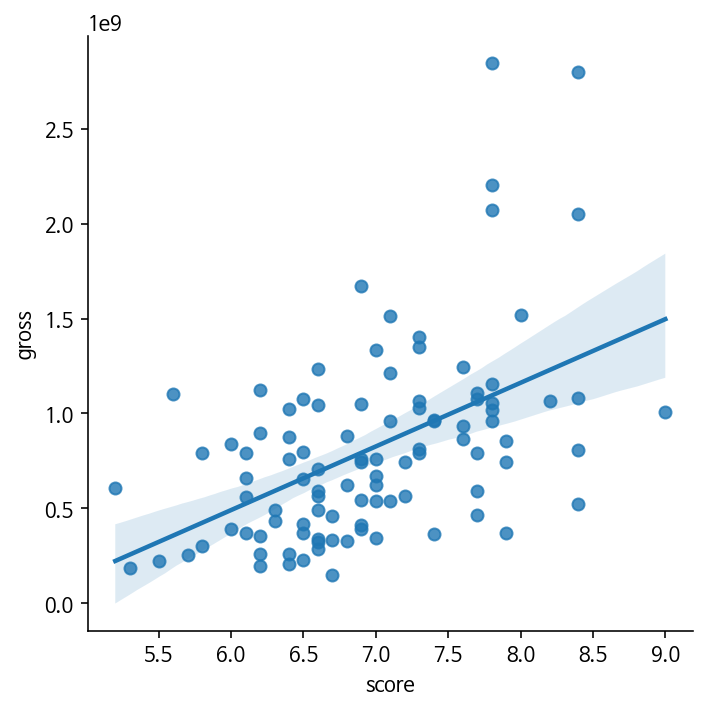

In [59]:
sns.lmplot(x='score', y='gross', data=BudgetGrossScore)

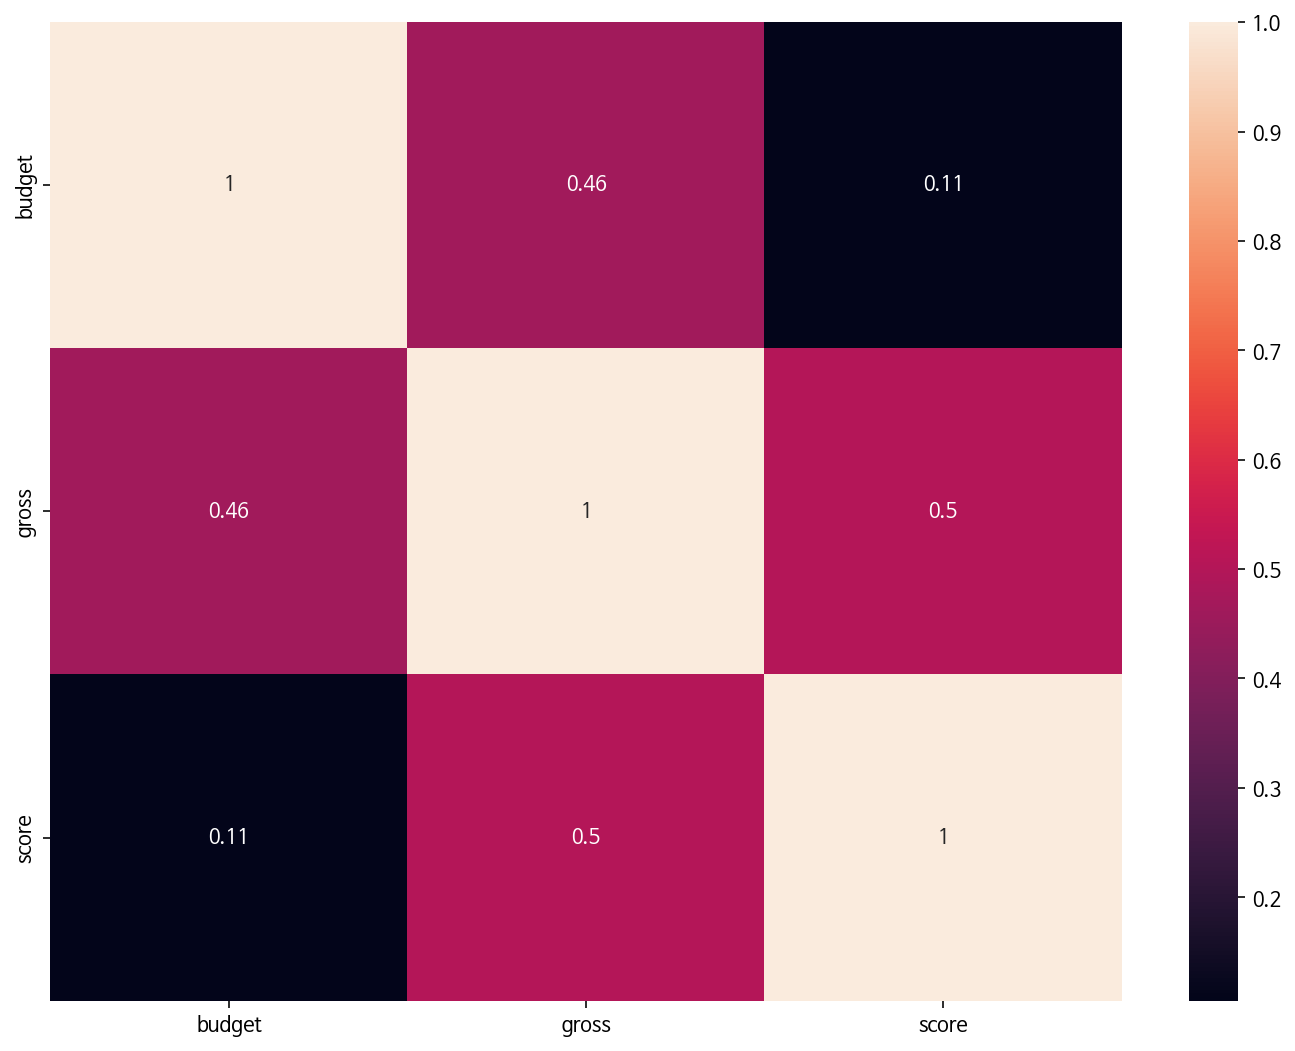

In [60]:
sns.heatmap(BudgetGrossScore.corr(), annot=True)

제작비가 가장 많은 영화 100편의 제작비, 매출, 평점을 추출하여 상관관계를 분석했다.  
제작비와 매출은 상관계수가 0.46으로 생각보다 높은 수치를 가지며 그래프에서도 양의 관계를 가짐을 확인할 수 있었다.  
제작비와 평점은 상관계수가 0.11로 그다지 높지 않은 관계를 가졌다.  
평점과 매출은 상관계수가 0.5로 가장 높았다. 관객은 평점이 높은 영화를 보려는 경향이 있으므로 이러한 결과가 나온 것이라고 생각한다.  
매출을 많이 내고 싶다면 많은 제작비를 투자하면 되지만, 뛰어난 영화를 만들기 위해서는 제작비보다 다른 요소에 더 신경을 쓰는 것이 효과적일 수도 있을 것이다.

#평점-러닝타임
러닝타임이 길다면 많은 메시지를 넣을 수 있고 따라서 평점 또한 높을 것이라는 가설을 세웠다.  
평점 수가 적다면 평점의 객관성이 떨어지므로 평점 수의 평균 이하의 영화는 제외하고 평점이 가장 높은 영화 100개를 추출하여 상관관계를 분석한다.

In [61]:
ScoreRuntime = df5[df5.votes > 89050]
ScoreRuntime = ScoreRuntime.sort_values('score', ascending=False).head(100)
ScoreRuntime = ScoreRuntime[['score', 'runtime']]
ScoreRuntime.head()

,score,runtime
2443,9.30,142
5243,9.00,152
2444,8.90,154
2247,8.90,195
4245,8.90,201


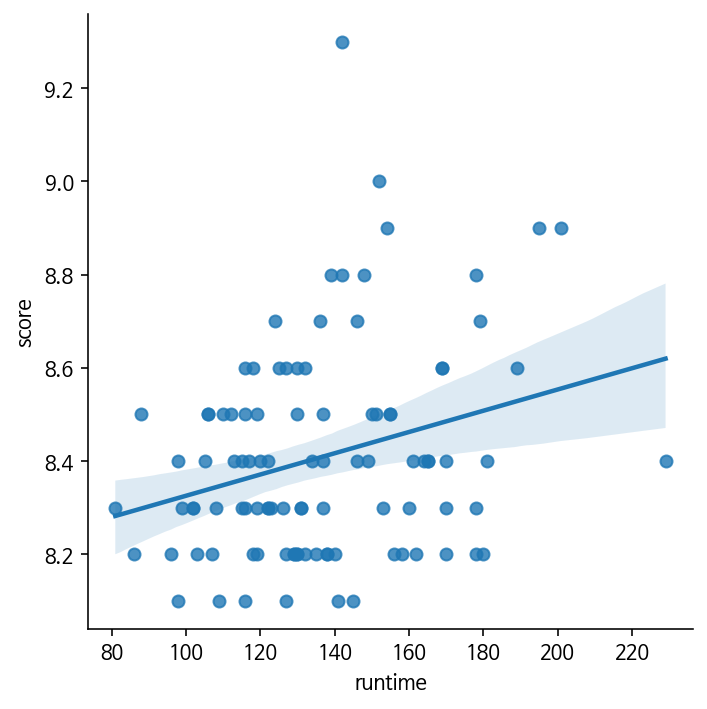

In [62]:
sns.lmplot(x='runtime', y='score', data=ScoreRuntime)

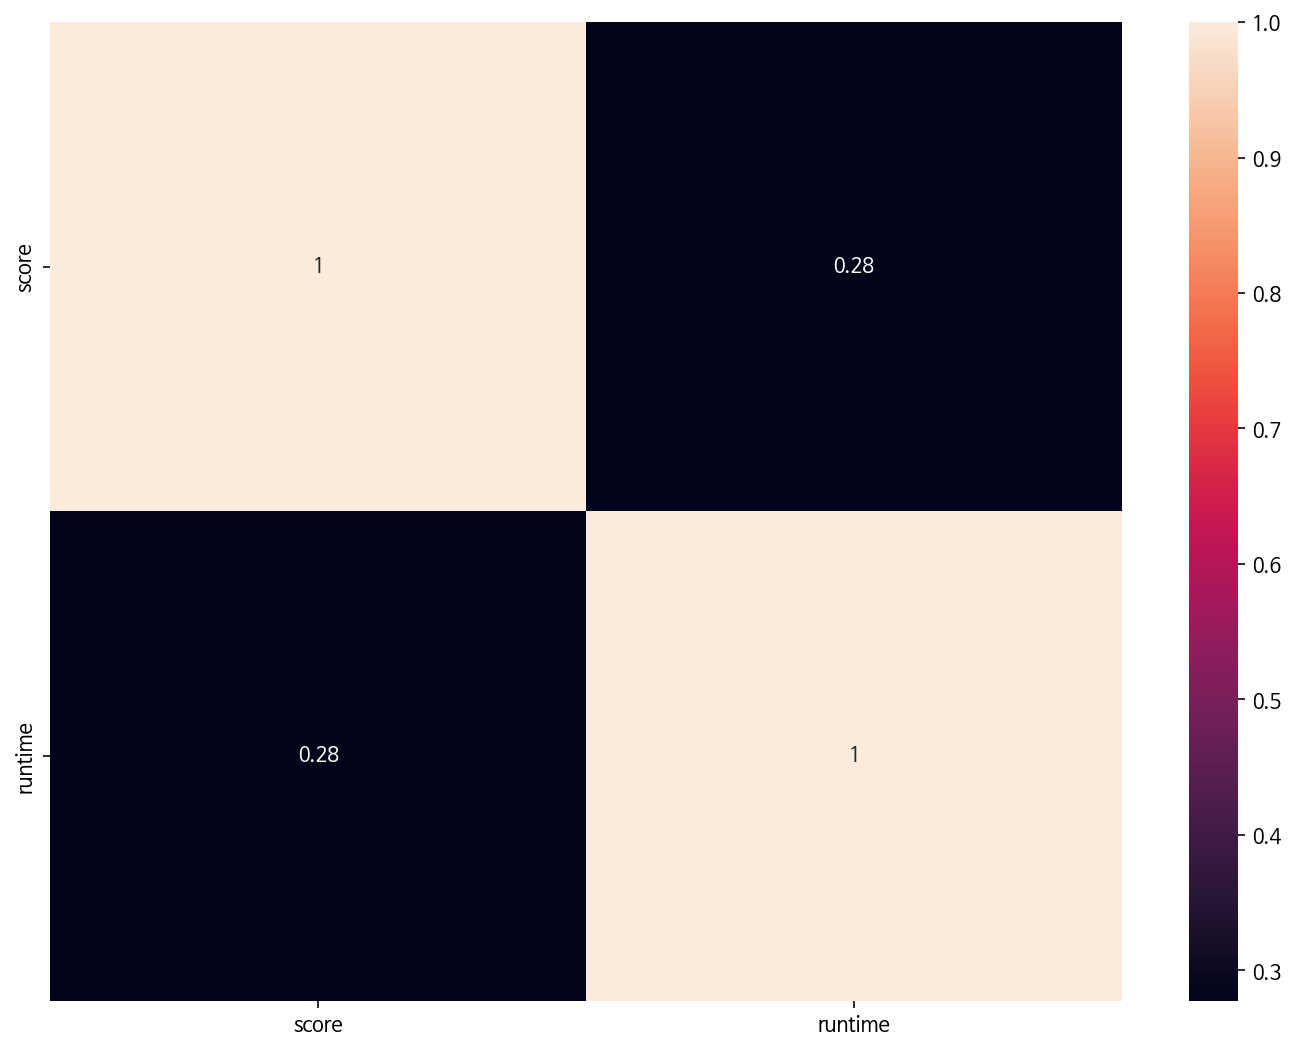

In [63]:
sns.heatmap(ScoreRuntime.corr(), annot=True)

생각보다 낮은 상관계수가 나왔다.  
상관계수는 0.28로 양의 관계를 가지긴 했지만 그렇게 높은 수치가 나오진 않았다.  
뛰어난 영화를 만들기 위해서 러닝타임을 무조건적으로 늘리는 것은 그렇게 효과적인 방법은 아니라고 생각된다.

#감독-평점

감독 순위를 알아보자.  
감독별 영화 평점의 평균을 구해 내림차순하여 가장 높은 평점의 영화를 만든 감독을 선정했다.  
평점의 수(votes)가 작은 영화인 경우 평점의 객관성이 떨어질 수 있으므로 평균 평점 수(약 89050개) 이하의 평점 수를 가진 영화는 제외하였다.

In [64]:
DirectorScore = df5[['director', 'score', 'votes']]

In [65]:
DirectorScore['votes'].mean() #평점 수의 평균치

89050.65956602276

In [66]:
DirectorScore2 = DirectorScore[DirectorScore.votes > 89050]

In [67]:
DirectorScore3 = DirectorScore2.groupby('director')['score'].mean()

In [68]:
DirectorScore4 = DirectorScore3.sort_values(ascending=False)

In [69]:
DirectorScore4.head(10)

director
Irvin Kershner     8.70
Roberto Benigni    8.60
Tony Kaye          8.50
Olivier Nakache    8.50
Roger Allers       8.50
Bob Persichetti    8.40
Nitesh Tiwari      8.40
Aamir Khan         8.40
Sergio Leone       8.40
Stanley Kubrick    8.35
Name: score, dtype: float64

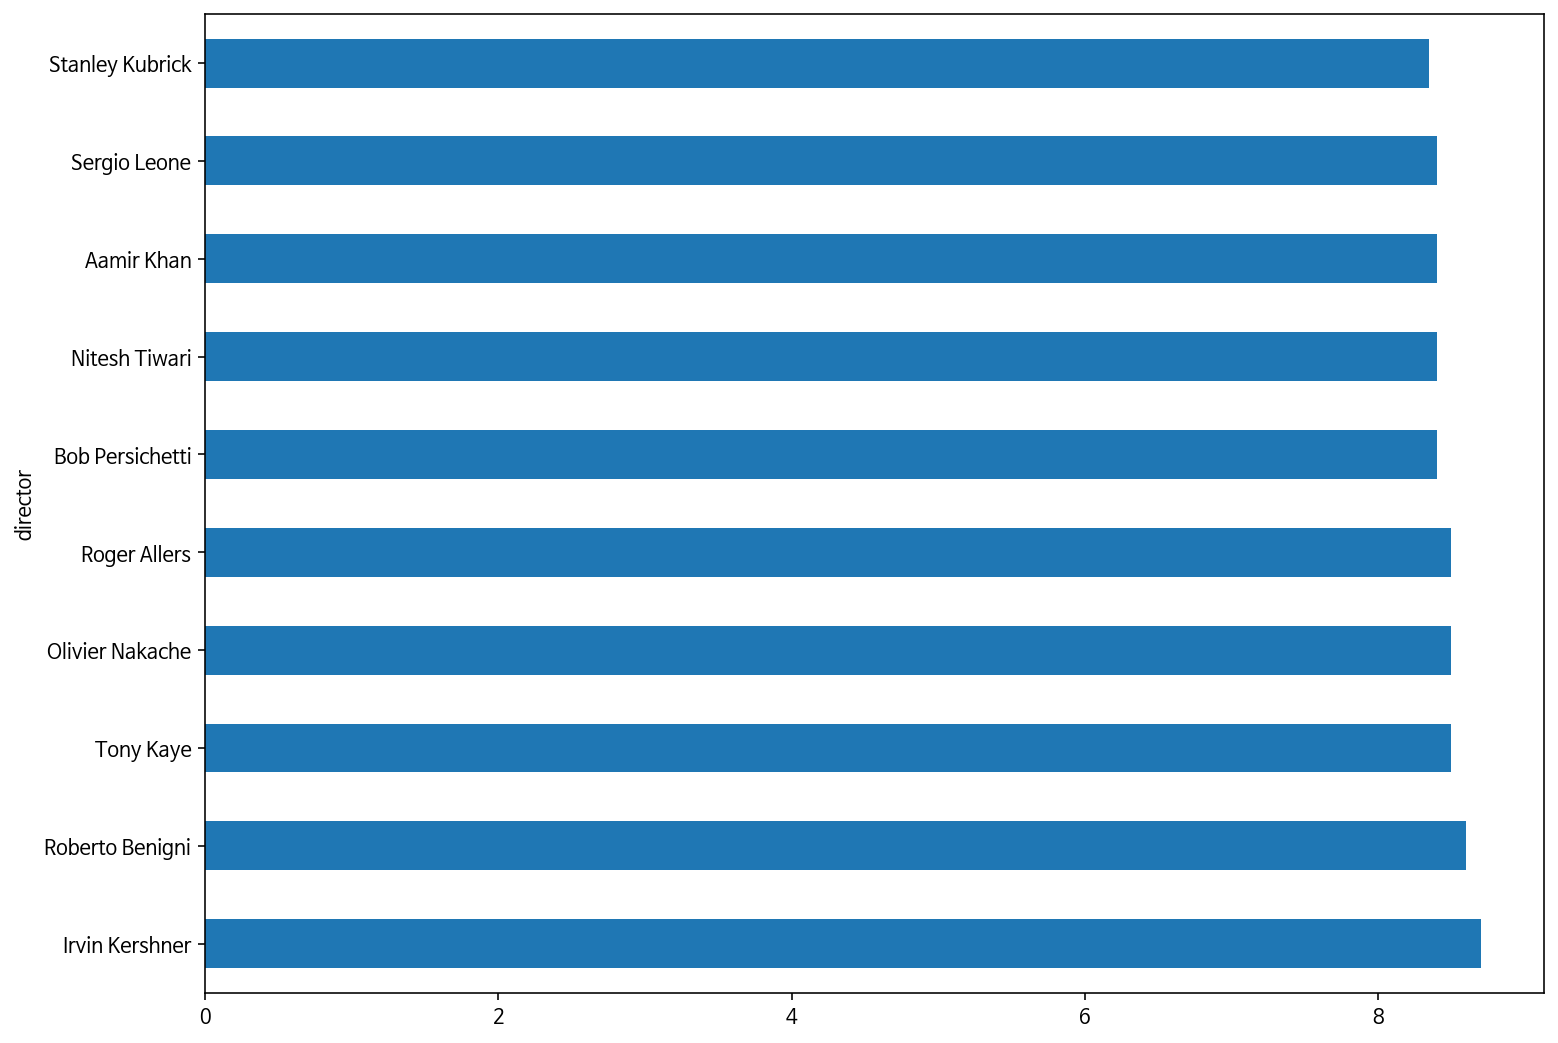

In [70]:
DirectorScore4.head(10).plot(kind='barh')

의외로 익숙한 감독이 아닌 반가운 이름의 감독들이 순위권에 들었다.  
<로보캅2>, <스타워즈: 제국의 역습>을 만든 어빈 커슈너가 8.7점으로 1위를 차지했다.  
이어서 <인생은 아름다워>, <피노키오>로 유명한 로베르토 베니니가 8.6점으로 2위에 위치했다.  
그 외로는 <석양의 무법자>의 세르지오 레오네, <2001:스페이스 오디세이>와 <샤이닝>의 스탠리 큐브릭이 들었다.  
모두 명감독이지만 예전에 활동했거나, 인지도가 다소 떨어지는 감독들이 순위에 들었다고 느꼈다. 

#개봉연도-러닝타임

In [71]:
YearRuntime = df5[['year', 'runtime']]
YearRuntime.head()

,year,runtime
0,1980,146
1,1980,104
2,1980,124
3,1980,88
4,1980,98


In [72]:
YearRuntime2 = YearRuntime.groupby('year').mean()

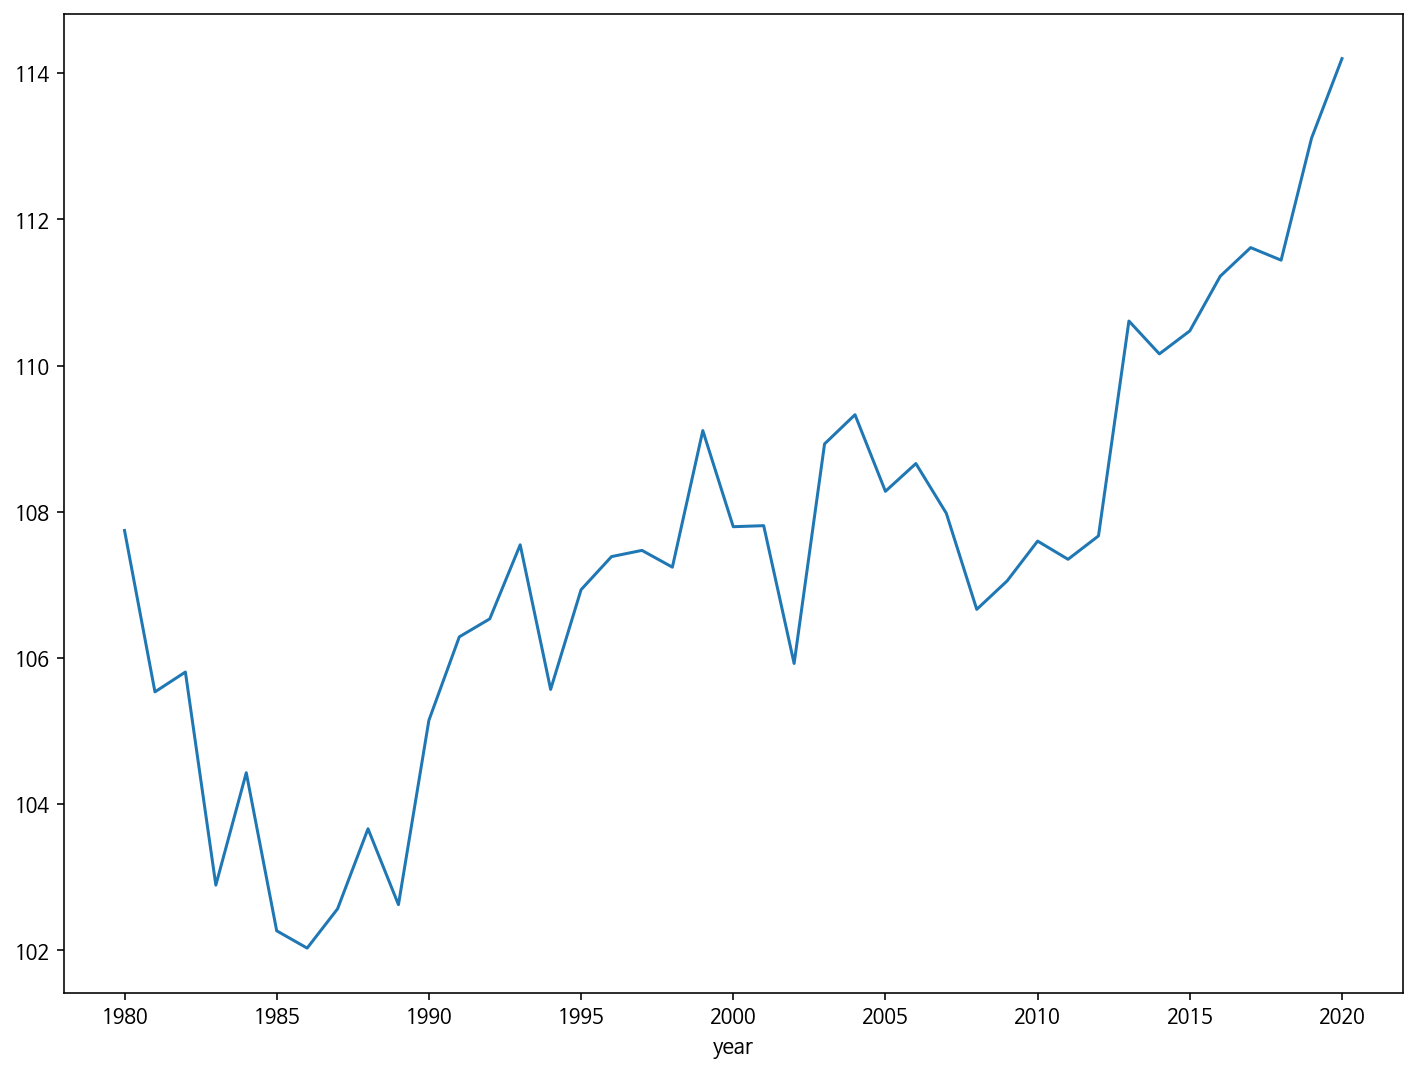

In [73]:
YearRuntime2['runtime'].plot(kind='line')

영화의 러닝타임을 연도별 평균으로 나타낸 그래프이다.  
러닝타임은 1990년도부터 지금까지 길어져 2020년에는 114분을 넘어 2시간 가까이까지 달한다.  
특이한 지점은 러닝타임이 줄어드는 1980년~1990년 구간이다. 당시 비디오 테이프가 발명되며 영화를 영화관에서 상영하는 1차 판매 외에도 비디오에 담아 판매하는 2차 판매가 이루어지던 시기이다. 따라서 비디오에 영화를 담기 위해서는 영화가 최대한 짧아져야 했다. 따라서 80년대 초반에는 110분에 가깝던 영화의 러닝타임이 80년대 중반에는 100분 초반대로 줄어든 것을 볼 수 있다.

# 개봉연도-분당제작비

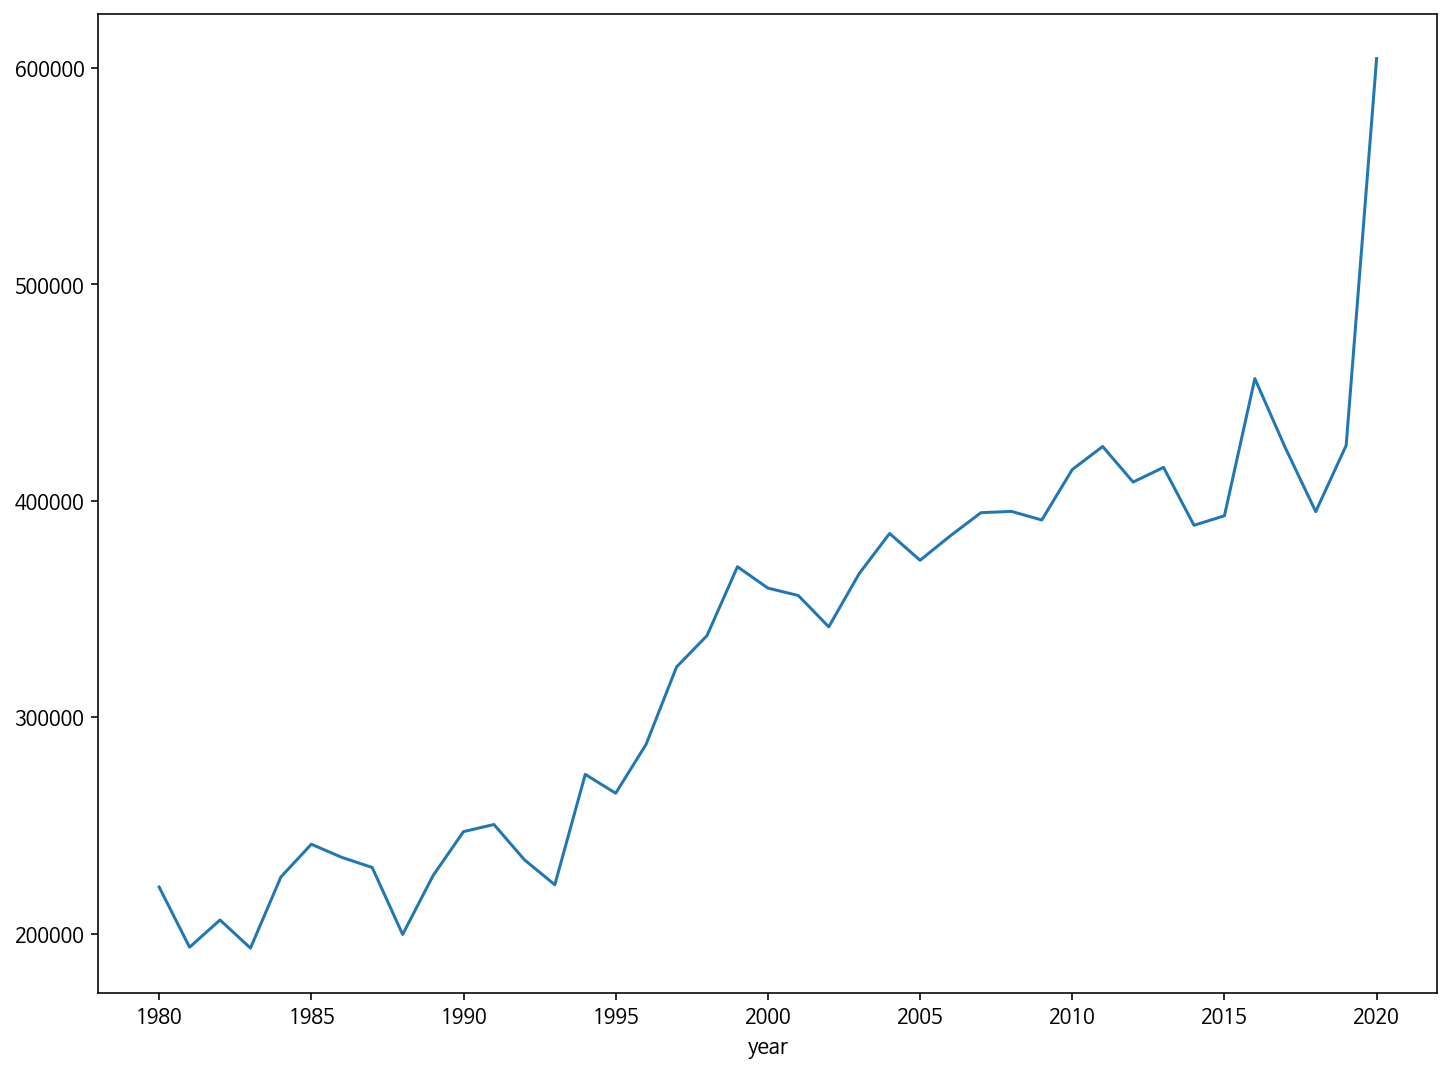

In [114]:
YearTimecost = df5.groupby('year').mean()
YearTimecost['timecost'].plot(kind='line')

러닝타임에 이어 시간이 지날수록 분당제작비도 증가하는 추세이다.  
영화 산업의 규모가 커지며 최근의 영화들은 대규모 자본을 투입한 블록버스터 영화의 비중이 증가했고 물가변동률도 이러한 결과에 영향을 끼쳤을 것이다.

#ROI순 영화 10위

In [74]:
df5.sort_values(['roi'], ascending=False).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,5.00,275,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000,78500541,Pirromount Pictures,80,2616684.70,37.50
7658,Black Wall Street Burning,R,Drama,2020,6.60,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78,1570010.82,64.10
5114,Paranormal Activity,R,Horror,2007,6.30,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86,1289038.67,174.42
327,Boardinghouse,R,Comedy,1982,3.80,651,John Wintergate,John Wintergate,John Wintergate,United States,10000,78500541,Blustarr,98,785005.41,102.04
3459,The Blair Witch Project,R,Horror,1999,6.50,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81,414398.50,740.74
2222,Laws of Gravity,R,Crime,1992,6.80,950,Nick Gomez,Nick Gomez,Peter Greene,United States,38000,78500541,Island World,100,206580.37,380.00
1578,The Unbelievable Truth,R,Comedy,1989,7.30,5000,Hal Hartley,Hal Hartley,Adrienne Shelly,United States,75000,78500541,Action Features,90,104667.39,833.33
1184,Creepozoids,R,Horror,1987,4.00,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,78500541,Titan Productions,72,104667.39,1041.67
1183,"Silent Night, Deadly Night Part 2",R,Horror,1987,3.80,6400,Lee Harry,Michael Hickey,Eric Freeman,United States,100000,78500541,Silent Night Releasing Corporation,88,78500.54,1136.36
2196,Claire of the Moon,Unrated,Drama,1992,5.10,950,Nicole Conn,Nicole Conn,Trisha Todd,United States,130000,78500541,Demi-Monde Productions,107,60385.03,1214.95


ROI가 높은 영화 10위 목록이다.

목록 중 새로운 형태의 공포영화를 보여준 파라노말 액티비티나 뛰어난 마케팅과 특이한 촬영 방식으로 유명한 블레어 위치가 익숙하다.  
코미디와 공포 장르의 영화가 각 4개씩 위치한 것을 보면 적은 제작비로 높은 관객의 호응을 이끌어내려면 감정, 본능에 충실해야 하며 이에 효과적인 장르가 바로  코미디와 공포일 것이다.  
최근 유튜브에서도 많이 보이는 상황극 채널들이 대부분 코미디에 중점을 맞추고 있는 것도 이러한 맥락일 것이라고 생각한다.  
특이한 점은 순위의 모든 영화가 높은 등급인 것이다. 일반적으로 관객의 대상이 넓은 낮은 등급의 영화가 높은 ROI를 기록할 것이라는 생각과 다른 결과가 나왔다.

#등급-ROI

In [75]:
RatingRoi = df5.groupby('rating')['roi'].mean()

In [76]:
RatingRoi = RatingRoi.sort_values()

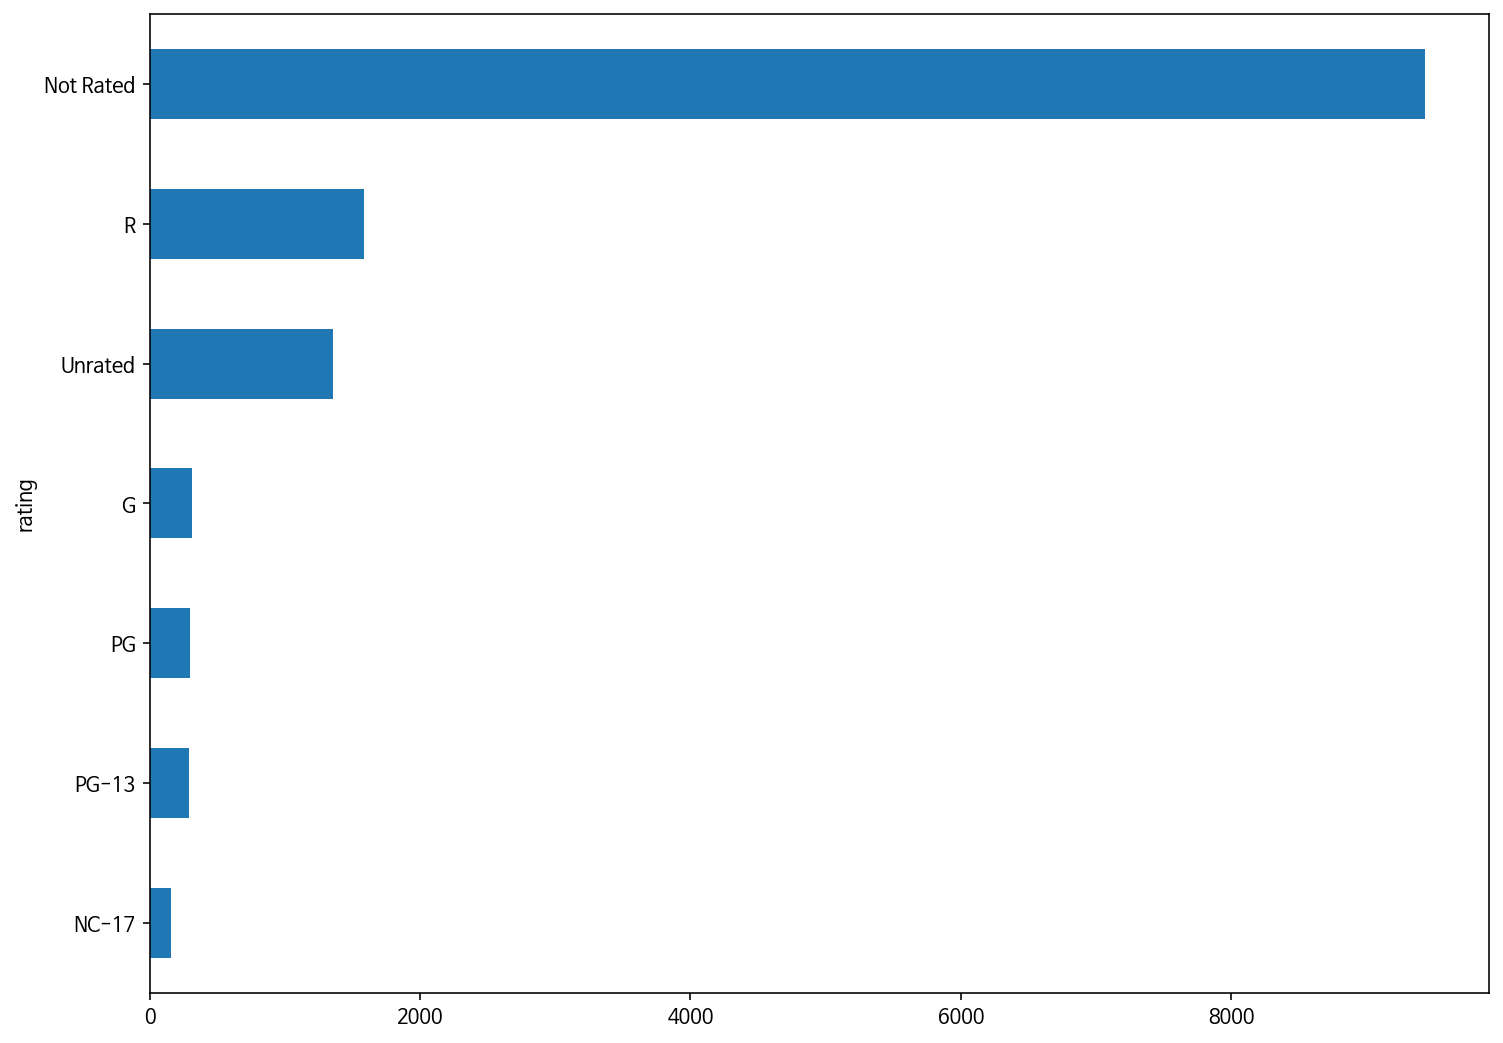

In [77]:
RatingRoi.plot(kind='barh')

등급별 ROI의 평균을 나타낸 막대그래프이다.  
낮은 등급의 영화보다 Not Rated, R, Unrated 영화가 높은 ROI를 기록했다. 이러한 점은 쏘우 시리즈와 같이 높은 등급의 영화에 매니악한 팬들을 보유한 영화가 많기 때문이라고 생각한다.  
또한 미국에서는 80년대 초반까지 에로틱한 영화만을 상영하던 포르노 극장이 많을 정도로 포르노 영화가 많았으므로 적은 제작비에 높은 수익을 낼 수 있던 포르노 영화의 영향도 무시할 수 없다고 생각한다.

#매출순위 top10

In [78]:
df5.sort_values(['gross'], ascending=False).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
5445,Avatar,PG-13,Action,2009,7.80,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,1201.37,1462962.96
7445,Avengers: Endgame,PG-13,Action,2019,8.40,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,785.81,1966850.83
3045,Titanic,PG-13,Drama,1997,7.80,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1100.82,1030927.84
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.80,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,844.70,1775362.32
7244,Avengers: Infinity War,PG-13,Action,2018,8.40,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,638.12,2154362.42
7480,The Lion King,PG,Animation,2019,6.90,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,642.59,2203389.83
6653,Jurassic World,PG-13,Action,2015,7.00,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,1113.68,1209677.42
6043,The Avengers,PG-13,Action,2012,8.00,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,690.37,1538461.54
6646,Furious 7,PG-13,Action,2015,7.10,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,797.55,1386861.31
7494,Frozen II,PG,Animation,2019,6.80,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,966.68,1456310.68


매출 순위 top10 영화 목록이다. 이름만 들어도 알만한 영화들이 속해있다.  
특이한 점은 타이타닉이다. 개봉년도가 목록에서 다른 영화들에 비해 이른 1997년이다. 지금은 아저씨가 된 디카프리오의 리즈시절이 담겨있다.  
순위 중 프랜차이즈의 영화가 많이 속해있다. 어벤저스, 스타워즈, 쥬라기 시리즈, 분노의 질주와 같은 시리즈가 순위에 속해 있다. 이러한 대표적인 프랜차이즈 영화만을 추출하여 자세히 살펴보자

#프랜차이즈 영화

In [79]:
marvel = df5.loc[(df5['company'] == 'Marvel Studios')]

In [80]:
marvel.head() #제작사가 '마블스튜디오'인 데이터 추출

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
6043,The Avengers,PG-13,Action,2012,8.00,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,690.37,1538461.54
6244,Iron Man 3,PG-13,Action,2013,7.10,779000,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000,1214811252,Marvel Studios,130,607.41,1538461.54
6247,Thor: The Dark World,PG-13,Action,2013,6.80,618000,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000,644783140,Marvel Studios,112,379.28,1517857.14
6443,Guardians of the Galaxy,PG-13,Action,2014,8.00,1100000,James Gunn,James Gunn,Chris Pratt,United States,170000000,773350147,Marvel Studios,121,454.91,1404958.68
6644,Avengers: Age of Ultron,PG-13,Action,2015,7.30,777000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141,561.12,1773049.65


In [81]:
swfj = df5[df5['name'].str.contains('Star Wars|Furious|Jurassic', na = False)]
swfj.head() #제목에 스타워즈, Furious(분노의질주 시리즈), Jurassic(쥬라기 시리즈)가 포함된 데이터 추출

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.97,145161.29
333,Star Wars: Episode VI - Return of the Jedi,PG,Action,1983,8.30,973000,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000,475106177,Lucasfilm,131,1461.87,248091.60
2245,Jurassic Park,PG-13,Action,1993,8.10,894000,Steven Spielberg,Michael Crichton,Sam Neill,United States,63000000,1033928303,Universal Pictures,127,1641.16,496062.99
3064,The Lost World: Jurassic Park,PG-13,Action,1997,6.60,388000,Steven Spielberg,Michael Crichton,Jeff Goldblum,United States,73000000,618638999,Universal Pictures,129,847.45,565891.47
3451,Star Wars: Episode I - The Phantom Menace,PG,Action,1999,6.50,748000,George Lucas,George Lucas,Ewan McGregor,United States,115000000,1027082707,Lucasfilm,136,893.12,845588.24


In [82]:
franchise = pd.concat([marvel, swfj]) #두 데이터프레임 합치기
franchise

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
6043,The Avengers,PG-13,Action,2012,8.00,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,690.37,1538461.54
6244,Iron Man 3,PG-13,Action,2013,7.10,779000,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000,1214811252,Marvel Studios,130,607.41,1538461.54
6247,Thor: The Dark World,PG-13,Action,2013,6.80,618000,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000,644783140,Marvel Studios,112,379.28,1517857.14
6443,Guardians of the Galaxy,PG-13,Action,2014,8.00,1100000,James Gunn,James Gunn,Chris Pratt,United States,170000000,773350147,Marvel Studios,121,454.91,1404958.68
6644,Avengers: Age of Ultron,PG-13,Action,2015,7.30,777000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141,561.12,1773049.65
6846,Captain America: Civil War,PG-13,Action,2016,7.80,694000,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000,1153337496,Marvel Studios,147,461.33,1700680.27
6849,Doctor Strange,PG-13,Action,2016,7.50,628000,Scott Derrickson,Jon Spaihts,Benedict Cumberbatch,United States,165000000,677796076,Marvel Studios,115,410.79,1434782.61
7049,Guardians of the Galaxy Vol. 2,PG-13,Action,2017,7.60,596000,James Gunn,James Gunn,Chris Pratt,United States,200000000,863756051,Marvel Studios,136,431.88,1470588.24
7244,Avengers: Infinity War,PG-13,Action,2018,8.40,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,638.12,2154362.42
7247,Black Panther,PG-13,Action,2018,7.30,661000,Ryan Coogler,Ryan Coogler,Chadwick Boseman,United States,200000000,1347597973,Marvel Studios,134,673.80,1492537.31


In [83]:
franchise.describe()

,year,score,votes,budget,gross,runtime,roi,timecost
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2009.94,7.13,586833.33,166972222.22,969179119.53,129.47,685.98,1246302.96
std,9.99,0.77,304817.46,89191362.85,593538189.32,17.19,502.23,573155.16
min,1980.00,5.90,61000.00,8500000.00,68282844.00,92.00,142.88,86734.69
25%,2004.50,6.57,326250.00,91000000.00,598573016.00,120.25,418.00,809180.08
50%,2014.50,7.00,594500.00,170000000.00,866073305.50,132.00,553.33,1395910.00
75%,2017.00,7.80,777500.00,226250000.00,1316024429.50,138.50,788.75,1579016.22
max,2019.00,8.70,1300000.00,356000000.00,2797501328.00,181.00,2990.97,2154362.42


매출 top10목록에 든 프랜차이즈 영화들을 추출해서 데이터프레임을 만들었다.  
수익(gross)의 평균 항목이 전체 영화의 데이터보다 훨씬 크다. 전체 영화의 수익 평균은 79004275.95달러에 비해 프랜차이즈 영화들의 수익 평균은 969179119.53달러로 약 12배 가량 크다.  
하지만 ROI의 평균 항목에서는 프랜차이즈 영화(685.98%)가 전체 영화(1272.91%)보다 비교적 적은 수치를 가진다. 프랜차이즈 영화 대부분이 큰 제작비를 가지기 때문일 것이다.  
제작비(budget)도 크게 차이가 난다. 프랜차이즈 영화의 평균 제작비(166972222.22달러)는 전체 영화의 제작비 평균(35686162.39달러)보다 4배 이상 높은 수치를 가진다.  
분당제작비용(timecost)에서도 프랜차이즈 영화의 평균(1246302.96달러)이 전체 영화의 평균(327868.07달러)보다 약 4배 큰 것을 보면 프랜차이즈 영화의 제작비가 거대함을 알 수 있다.
가장 놀라웠던 점은 프랜차이즈 영화의 ROI항목 최솟값이 142.88%인 것이다. 아무리 엉망에 흥행을 못하더라도 제작비보다 높은 수익을 기록하는 프랜차이즈의 힘을 볼 수 있었다.

#스타워즈

In [84]:
starwars = swfj[df5['name'].str.contains('Star Wars', na = False)]
starwars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.97,145161.29
333,Star Wars: Episode VI - Return of the Jedi,PG,Action,1983,8.30,973000,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000,475106177,Lucasfilm,131,1461.87,248091.60
3451,Star Wars: Episode I - The Phantom Menace,PG,Action,1999,6.50,748000,George Lucas,George Lucas,Ewan McGregor,United States,115000000,1027082707,Lucasfilm,136,893.12,845588.24
4058,Star Wars: Episode II - Attack of the Clones,PG,Action,2002,6.50,658000,George Lucas,George Lucas,Hayden Christensen,United States,115000000,653779970,Lucasfilm,142,568.50,809859.15
4658,Star Wars: Episode III - Revenge of the Sith,PG-13,Action,2005,7.50,729000,George Lucas,George Lucas,Hayden Christensen,United States,113000000,868390560,Lucasfilm,140,768.49,807142.86
5366,Star Wars: The Clone Wars,PG,Animation,2008,5.90,61000,Dave Filoni,Henry Gilroy,Matt Lanter,United States,8500000,68282844,Lucasfilm Animation,98,803.33,86734.69
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.80,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,844.70,1775362.32
6869,Rogue One: A Star Wars Story,PG-13,Action,2016,7.80,572000,Gareth Edwards,Chris Weitz,Felicity Jones,United States,200000000,1056057720,Lucasfilm,133,528.03,1503759.40
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.00,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,420.41,2085526.32
7261,Solo: A Star Wars Story,PG-13,Action,2018,6.90,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135,142.88,2037037.04


In [85]:
starwars.loc[12] = ['Star Wars: Episode IV - A New Hope', 'PG', 1977, 'Action', 8.6, 1358397, 'George Lucas', 'George Lucas', 'Mark Hamill', 'United States', 11000000, 775398007, 'Lucasfilm', 121, 7049.07, 90909.09]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [86]:
starwars #새로운 희망 포함

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2990.97,145161.29
333,Star Wars: Episode VI - Return of the Jedi,PG,Action,1983,8.30,973000,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000,475106177,Lucasfilm,131,1461.87,248091.60
3451,Star Wars: Episode I - The Phantom Menace,PG,Action,1999,6.50,748000,George Lucas,George Lucas,Ewan McGregor,United States,115000000,1027082707,Lucasfilm,136,893.12,845588.24
4058,Star Wars: Episode II - Attack of the Clones,PG,Action,2002,6.50,658000,George Lucas,George Lucas,Hayden Christensen,United States,115000000,653779970,Lucasfilm,142,568.50,809859.15
4658,Star Wars: Episode III - Revenge of the Sith,PG-13,Action,2005,7.50,729000,George Lucas,George Lucas,Hayden Christensen,United States,113000000,868390560,Lucasfilm,140,768.49,807142.86
5366,Star Wars: The Clone Wars,PG,Animation,2008,5.90,61000,Dave Filoni,Henry Gilroy,Matt Lanter,United States,8500000,68282844,Lucasfilm Animation,98,803.33,86734.69
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.80,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,844.70,1775362.32
6869,Rogue One: A Star Wars Story,PG-13,Action,2016,7.80,572000,Gareth Edwards,Chris Weitz,Felicity Jones,United States,200000000,1056057720,Lucasfilm,133,528.03,1503759.40
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.00,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,420.41,2085526.32
7261,Solo: A Star Wars Story,PG-13,Action,2018,6.90,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135,142.88,2037037.04


*스타워즈4편 새로운 희망이 1977년에 개봉하여 데이터 파일에 포함되지 않았다. 따라서 새로운 희망의 데이터까지 포함하여 분석했다.

In [87]:
starwars.describe()

,score,votes,budget,gross,runtime,roi,timecost
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,7.33,704699.75,143750000.00,861320914.83,132.58,1405.29,1032127.22
std,0.92,366974.55,114648771.95,517569710.31,13.63,1925.29,800759.13
min,5.90,61000.00,8500000.00,68282844.00,98.00,142.88,86734.69
25%,6.50,527500.00,28875000.00,522557844.50,129.25,501.12,222359.02
50%,7.25,693500.00,115000000.00,821894283.50,135.50,785.91,827723.70
75%,7.92,900250.00,252500000.00,1061601437.25,140.25,1035.30,1819110.39
max,8.70,1358397.00,317000000.00,2069521700.00,152.00,7049.07,2085526.32


In [88]:
starwars.shape

(12, 16)

#스타워즈: ROI

In [89]:
starwarsroitrue = starwars.sort_values('roi')

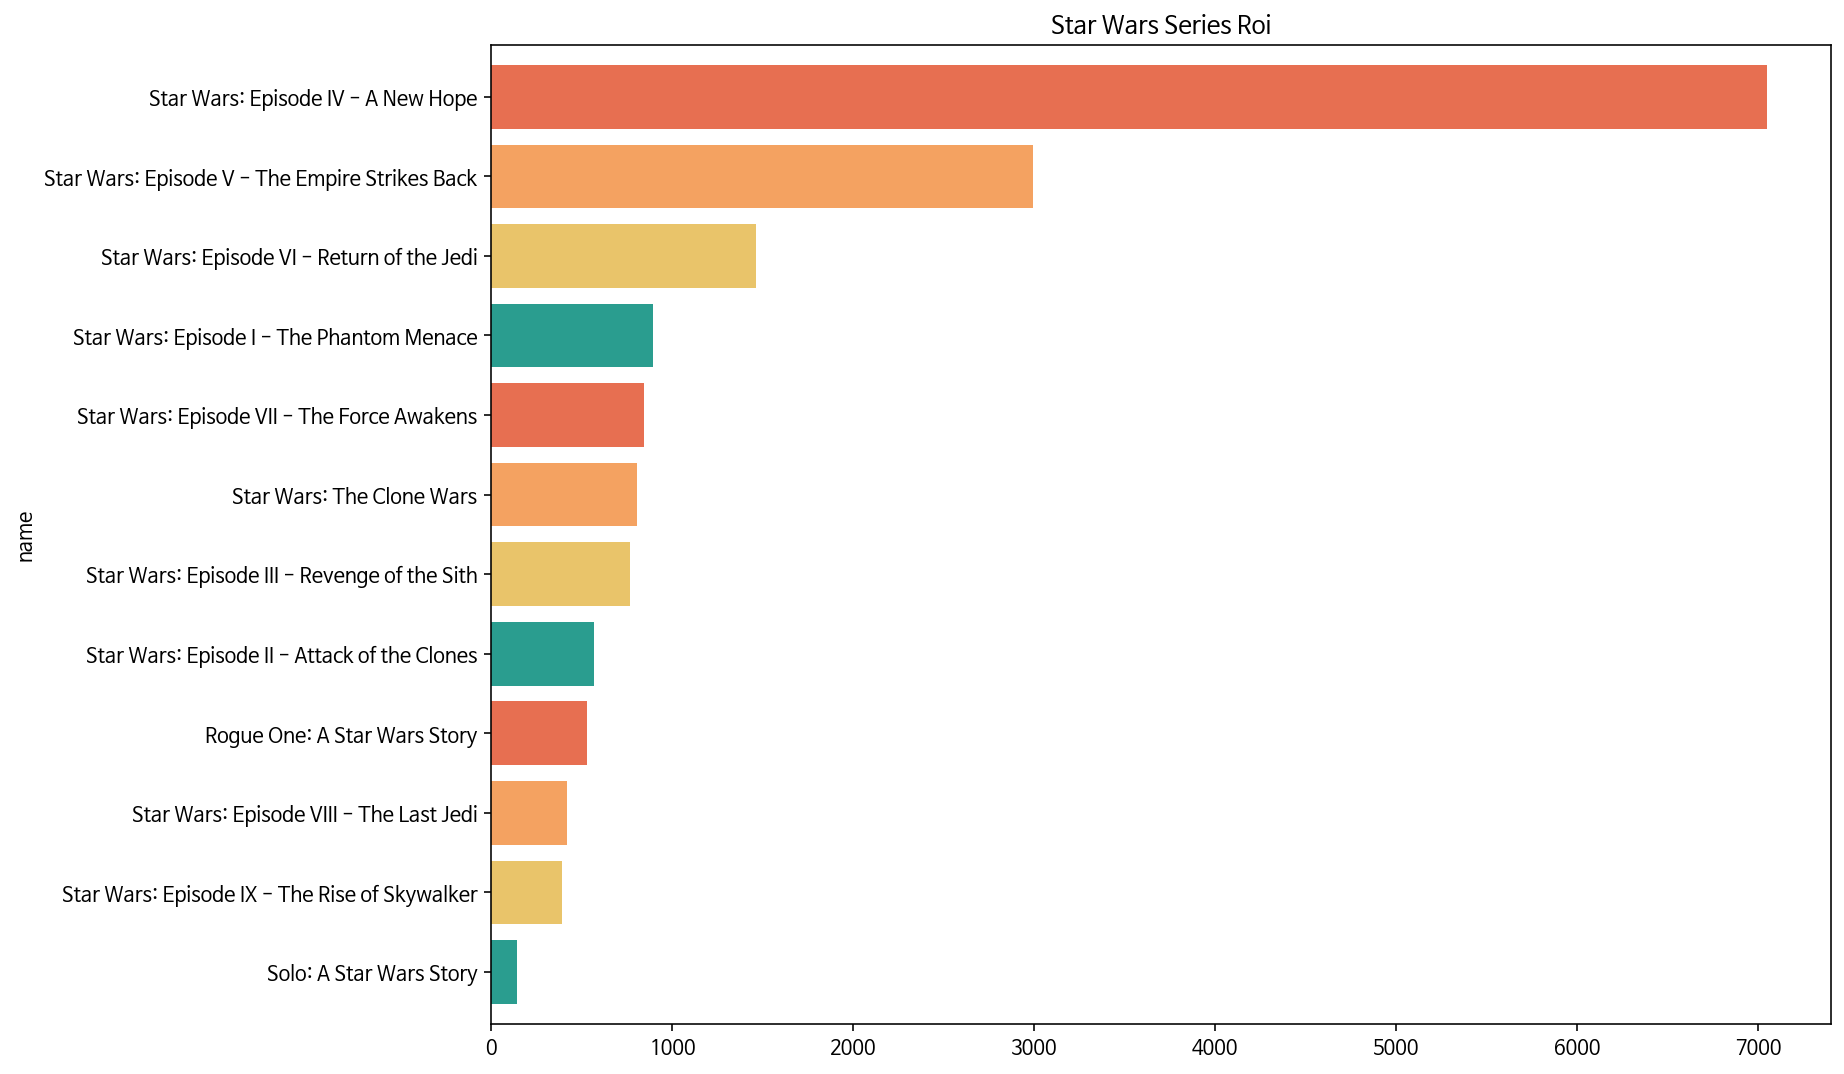

In [90]:
starwarsroitrue.plot.barh(x='name', y='roi', title="Star Wars Series Roi", width=0.8, color=['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'], legend=False)

In [91]:
starwarsroitrue2 = starwarsroitrue.groupby('name')['roi'].mean()

In [92]:
starwarsroitrue2 = starwarsroitrue2.sort_values(ascending=False)

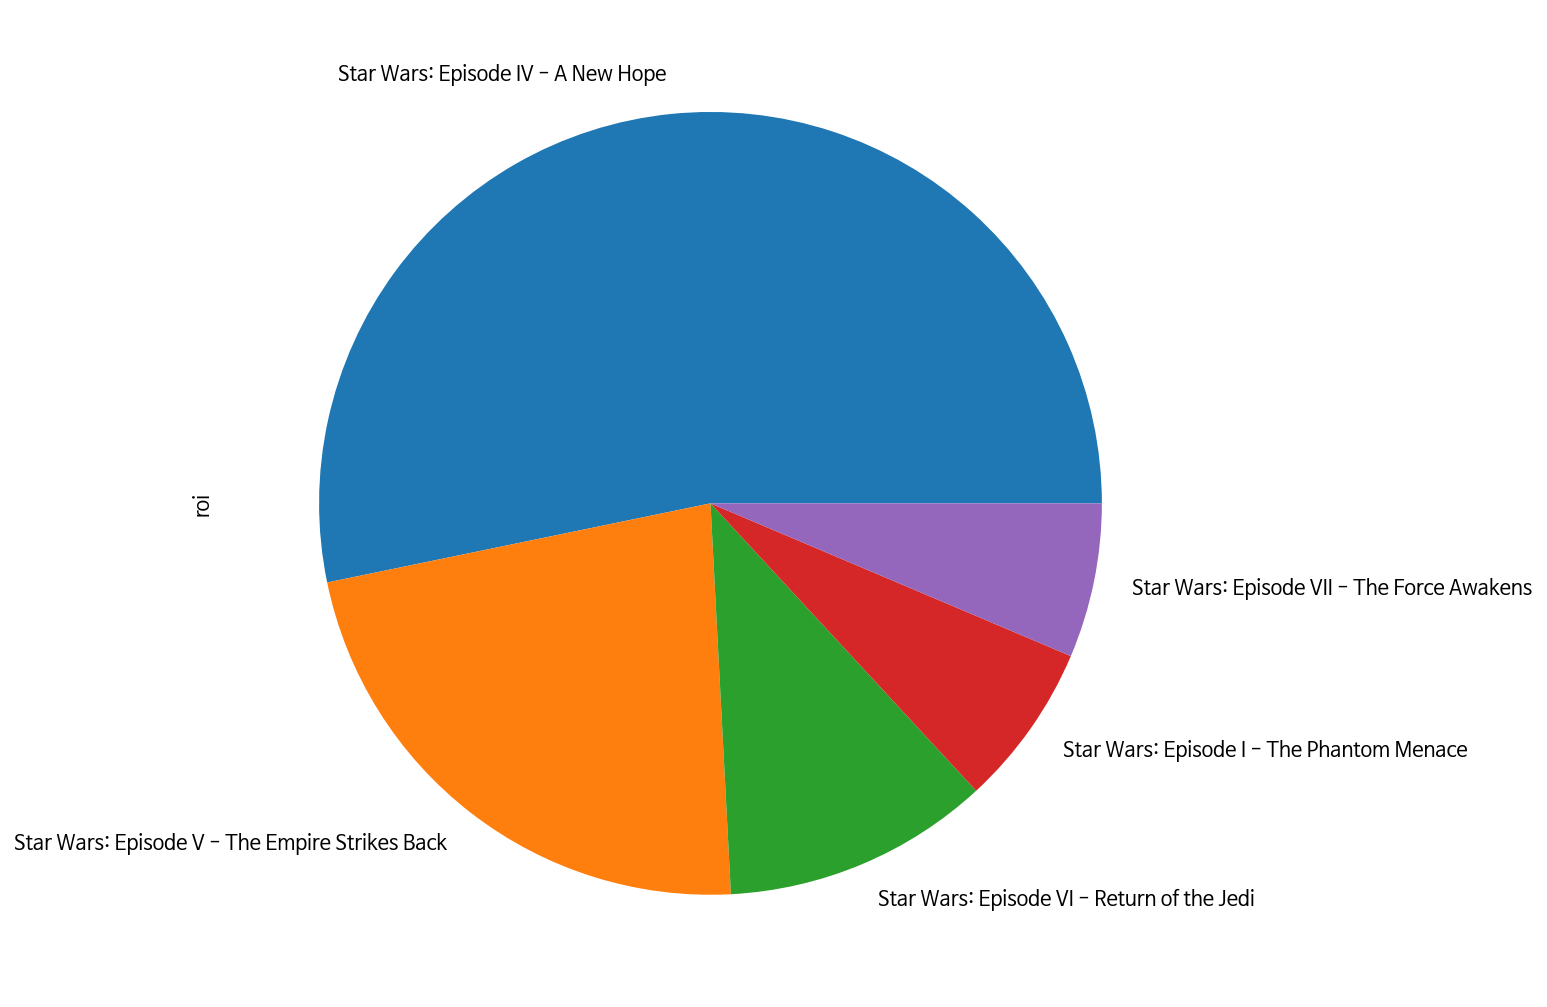

In [93]:
starwarsroitrue2.head(5).plot(kind='pie')

스타워즈의 시작인 새로운 희망이 시리즈 중 가장 높은 ROI를 기록했고 상위 다섯 영화로 만든 원형 그래프에서도 절반 이상의 ROI를 기록했다. 또한, 전체 영화 매출에서 순위권에 위치한 제다이의 귀환보다 새로운 희망과 제국의 역습이 높은 ROI를 가진 것을 보면 과거 스타워즈 시리즈의 인기가 거대했음을 유추할 수 있다.

#봉준호
봉준호 감독의 필모그래피에 대한 분석이다.

In [99]:
bong = df5[df5['director'].str.contains('Bong Joon Ho', na = False)]
bong.head() 

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,roi,timecost
4258,Memories of Murder,Not Rated,Crime,2003,8.10,152000,Bong Joon Ho,Bong Joon Ho,Kang-ho Song,South Korea,2800000,1162593,CJ Entertainment,132,41.52,21212.12
4895,The Host,R,Action,2006,7.10,112000,Bong Joon Ho,Bong Joon Ho,Kang-ho Song,South Korea,35589876,89433436,Chungeorahm Film,120,251.29,296582.30
5513,Mother,R,Crime,2009,7.80,56000,Bong Joon Ho,Bong Joon Ho,Hye-ja Kim,South Korea,5000000,17203507,CJ Entertainment,129,344.07,38759.69
6259,Snowpiercer,R,Action,2013,7.10,335000,Bong Joon Ho,Jacques Lob,Chris Evans,South Korea,39200000,86758912,SnowPiercer,126,221.32,311111.11
7452,Parasite,R,Comedy,2019,8.60,631000,Bong Joon Ho,Bong Joon Ho,Kang-ho Song,South Korea,11400000,258908054,Barunson E&A,132,2271.12,86363.64


'살인의 추억'의 gross(수익) 수치가 낮은데 이는 한국 수익이 제외된 것으로 보인다. 국내 흥행 성적에 대한 추가 조사에서도 관객수만 찾을 수 있었다.

In [102]:
bong.shape

(5, 16)

In [103]:
bong.describe()

,year,score,votes,budget,gross,runtime,roi,timecost
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,2010.00,7.74,257200.00,18797975.20,90693300.40,127.80,625.87,150805.77
std,6.24,0.65,233672.21,17315166.15,102139325.56,5.02,926.24,141818.74
min,2003.00,7.10,56000.00,2800000.00,1162593.00,120.00,41.52,21212.12
25%,2006.00,7.10,112000.00,5000000.00,17203507.00,126.00,221.32,38759.69
50%,2009.00,7.80,152000.00,11400000.00,86758912.00,129.00,251.29,86363.64
75%,2013.00,8.10,335000.00,35589876.00,89433436.00,132.00,344.07,296582.30
max,2019.00,8.60,631000.00,39200000.00,258908054.00,132.00,2271.12,311111.11


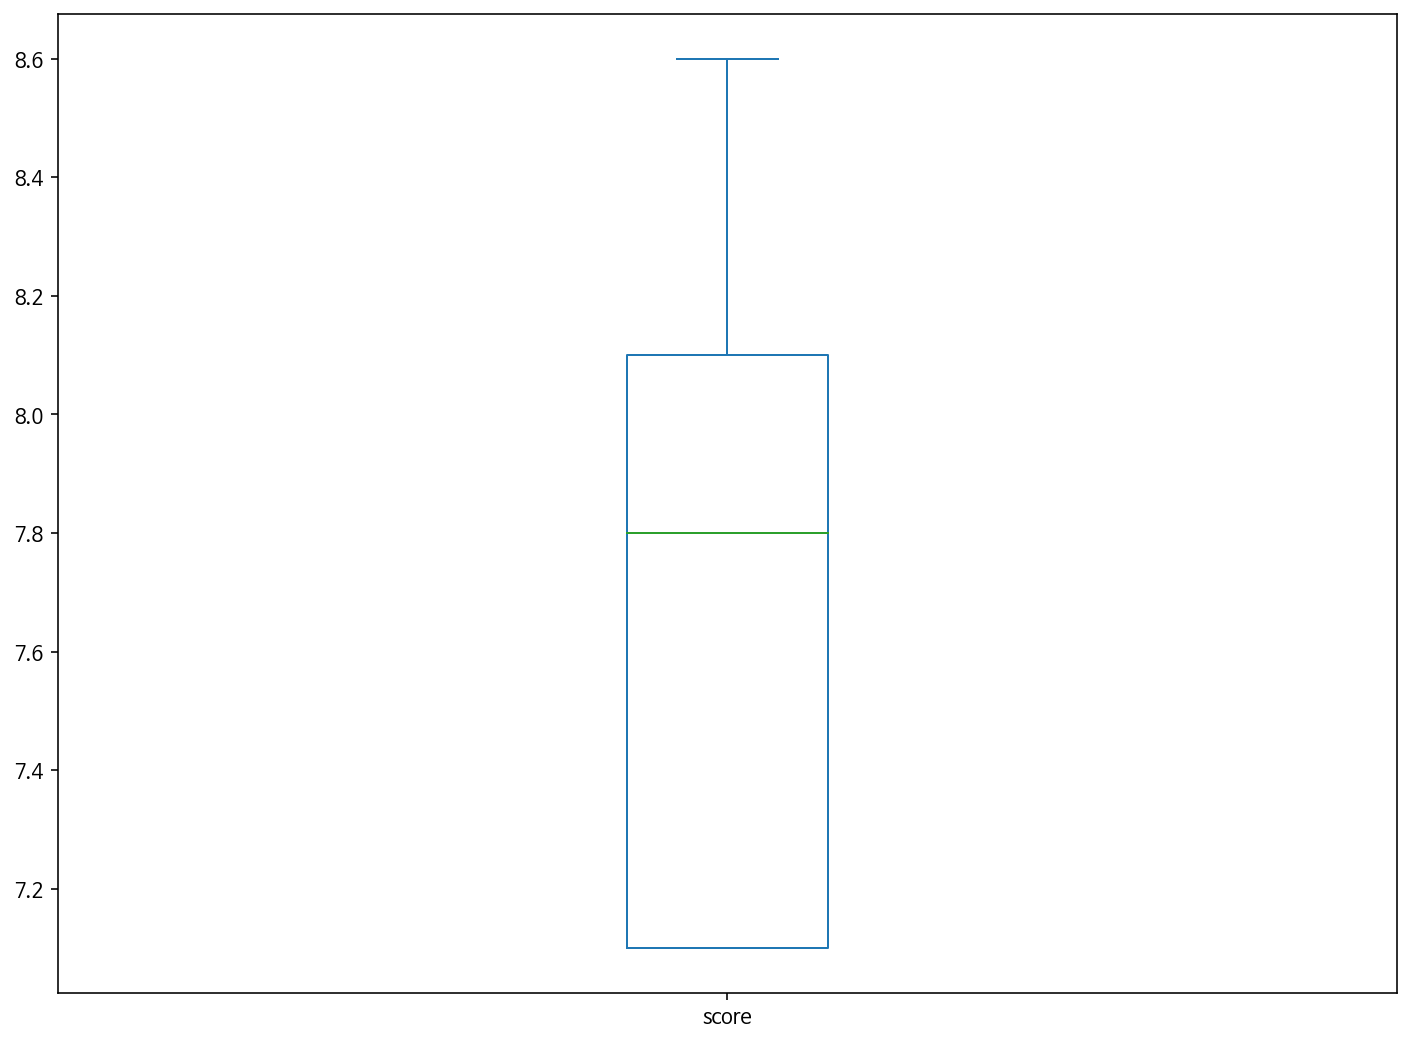

In [108]:
bong['score'].plot(kind='box')

평점의 평균은 7.74로 영화 전체의 평점 평균(6.39점)보다 높은 수치이다.  
제작비의 평균은 18797975.20달러로 영화 전체의 제작비의 평균(35686162.39달러)보다 약 2배 적지만, 수익의 평균은 약 1000만 달러 크다. 평점이 높은 만큼 관객들이 적극적으로 관람한 결과라고 생각된다.  
상자 수염 그림의 경우 IQR을 벗어난 최댓값이 존재한다. 이는 기생충의 수치로 기생충이 많은 영화제에서 수상을 이룰 정도로 뛰어난 작품이었기 때문으로 보인다.